<a href="https://colab.research.google.com/github/sjungmin98/study_data_analytics/blob/main/docs/quests/DDA/SpineSurgeryList_datetime.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 한글 폰트 설치
!apt-get install -y fonts-nanum
!fc-cache -fv
!rm ~/.cache/matplotlib -rf
# 설치 후 colab 경우 Runtime > Restart session 필요

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 31 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving SpineSurgeryList.csv to SpineSurgeryList.csv


In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font', family='NanumBarunGothic') # 혹은 다른 설치한 Nanum 폰트 사용
import seaborn as sns
from datetime import datetime

In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['SpineSurgeryList.csv']))

가장 빨리 퇴원한 경우: 0
가장 오래 입원한 경우: 51


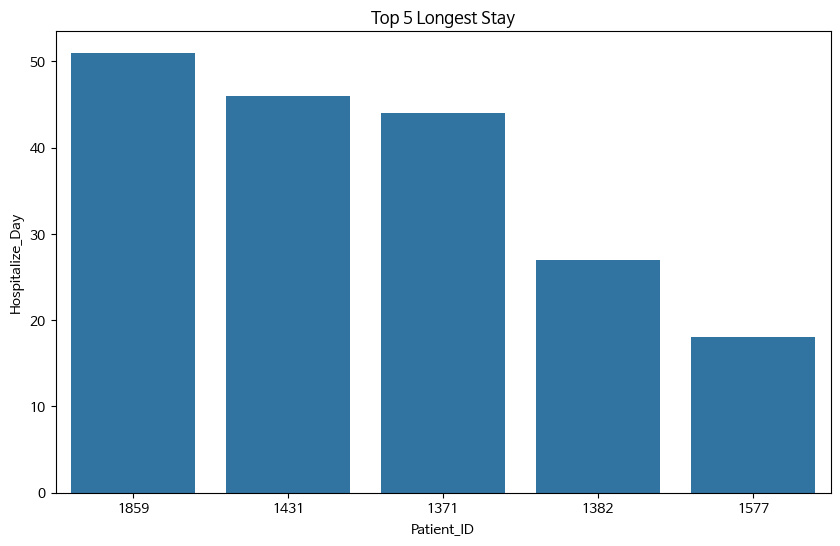

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('SpineSurgeryList.csv')

# 날짜 형식으로 변환
df['입원일자_new'] = pd.to_datetime(df['입원일자'])
df['퇴원일자_new'] = pd.to_datetime(df['퇴원일자'])
df['수술일자_new'] = pd.to_datetime(df['수술일자'])
df['입원기간_new'] = df['입원기간']

# 가장 빨리 퇴원한 경우와 가장 오래 입원한 경우 확인
min_stay = df['입원기간_new'].min()
max_stay = df['입원기간_new'].max()
print('가장 빨리 퇴원한 경우:', min_stay)
print('가장 오래 입원한 경우:', max_stay)

# 가장 오래 입원한 일자 중 5위까지 확인
top5_longest_stay = df.nlargest(5, '입원기간_new')

# 바 그래프로 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x=top5_longest_stay.index.astype(str), y='입원기간_new', data=top5_longest_stay)
plt.title('Top 5 Longest Stay')
plt.xlabel('Patient_ID')
plt.ylabel('Hospitalize_Day')
plt.show()